https://colab.research.google.com/drive/19IqhZAbjzYGT6dod65d16WggI-jtb0ZJ?usp=sharing

In [2]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2023-06-15 17:36:53--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.162.113, 142.251.162.102, 142.251.162.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.162.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7t62790trfmace3dgc1knbnhqq2611ao/1686850575000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=4c71d2ce-383b-4569-b0df-06c827eaa57e [following]
--2023-06-15 17:36:53--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7t62790trfmace3dgc1knbnhqq2611ao/1686850575000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=4c71d2ce-383b-4569-b0df-06c827eaa57e
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 108.177.12.132, 2

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./E-commerce.csv')
df.head()

ID  n_clicks  n_visits  amount_spent  amount_discount  \
0  1476       130        65    213.905831        31.600751   
1  1535       543        46    639.223004         5.689175   
2  1807       520       102   1157.402763       844.321606   
3  1727       702        83   1195.903634       850.041757   
4  1324       221        84    180.754616        64.283300   

   days_since_registration  profile_information  
0                      233                  235  
1                      228                  170  
2                      247                  409  
3                      148                  200  
4                      243                  259

In [5]:
sns.pairplot(df)

In [6]:
X=df.drop("ID",axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [8]:
X.head()

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  \
0       130        65    213.905831        31.600751                      233   
1       543        46    639.223004         5.689175                      228   
2       520       102   1157.402763       844.321606                      247   
3       702        83   1195.903634       850.041757                      148   
4       221        84    180.754616        64.283300                      243   

   profile_information  
0                  235  
1                  170  
2                  409  
3                  200  
4                  259

In [9]:
X.describe()

n_clicks     n_visits  amount_spent  amount_discount  \
count  2500.00000  2500.000000   2500.000000      2500.000000   
mean    408.68000    94.475600   1445.090745       388.508637   
std     186.41409    38.866356   1167.663473       487.143968   
min      50.00000    10.000000      0.000000         0.000000   
25%     274.75000    67.000000    609.618538        56.298615   
50%     378.00000    92.000000   1036.189112       137.454623   
75%     522.00000   119.000000   1949.270949       679.540536   
max    1246.00000   259.000000   6567.402267      2428.406527   

       days_since_registration  profile_information  
count              2500.000000          2500.000000  
mean                200.973600           201.040400  
std                  99.136618           100.139213  
min                   0.000000             0.000000  
25%                 130.000000           132.000000  
50%                 200.000000           201.000000  
75%                 268.000000           270.000000  
max                 514.000000           585.000000

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [31]:
from sklearn.cluster import KMeans

k = 4 ## arbitrary value
kmeans = KMeans(n_clusters=k,random_state = 42,n_init=50)
y_pred = kmeans.fit_predict(X)

In [32]:
y_pred # (X1,2),(X2,2),...

array([2, 2, 0, ..., 1, 3, 0], dtype=int32)

In [33]:
kmeans.cluster_centers_

array([[0.45366522, 0.47069952, 0.21785614, 0.4714606 , 0.39136337,
        0.33723857],
       [0.28577678, 0.31518479, 0.10688227, 0.06262394, 0.23968543,
        0.33025593],
       [0.27341137, 0.32508496, 0.11269768, 0.06834083, 0.56636336,
        0.3465904 ],
       [0.16763001, 0.23205394, 0.5132428 , 0.03436531, 0.378177  ,
        0.36612938]])

In [34]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = y_pred #kmeans.labels_ # same as y_pred
clusters.head(3)
#len(kmeans.labels_)

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  \
0  0.066890  0.220884      0.032571         0.013013                 0.453307   
1  0.412207  0.144578      0.097333         0.002343                 0.443580   
2  0.392977  0.369478      0.176234         0.347685                 0.480545   

   profile_information  label  
0             0.401709      2  
1             0.290598      2  
2             0.699145      0

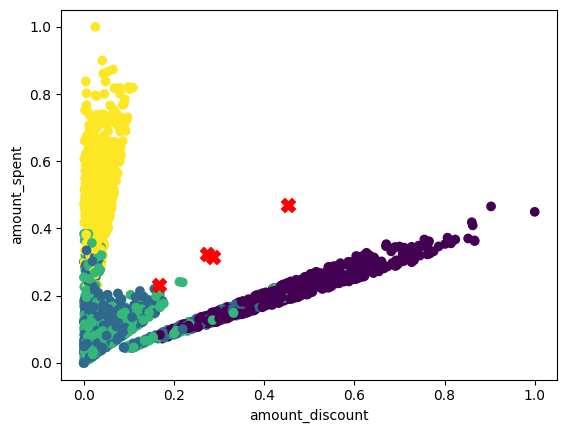

In [40]:
def viz_clusters(kmeans):
    plt.scatter(clusters['amount_discount'], clusters['amount_spent'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('amount_discount')
    plt.ylabel('amount_spent')

viz_clusters(kmeans)

In [36]:
# inertia = WCSS
kmeans_per_k = [KMeans(n_clusters=k, random_state=42,n_init=50).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

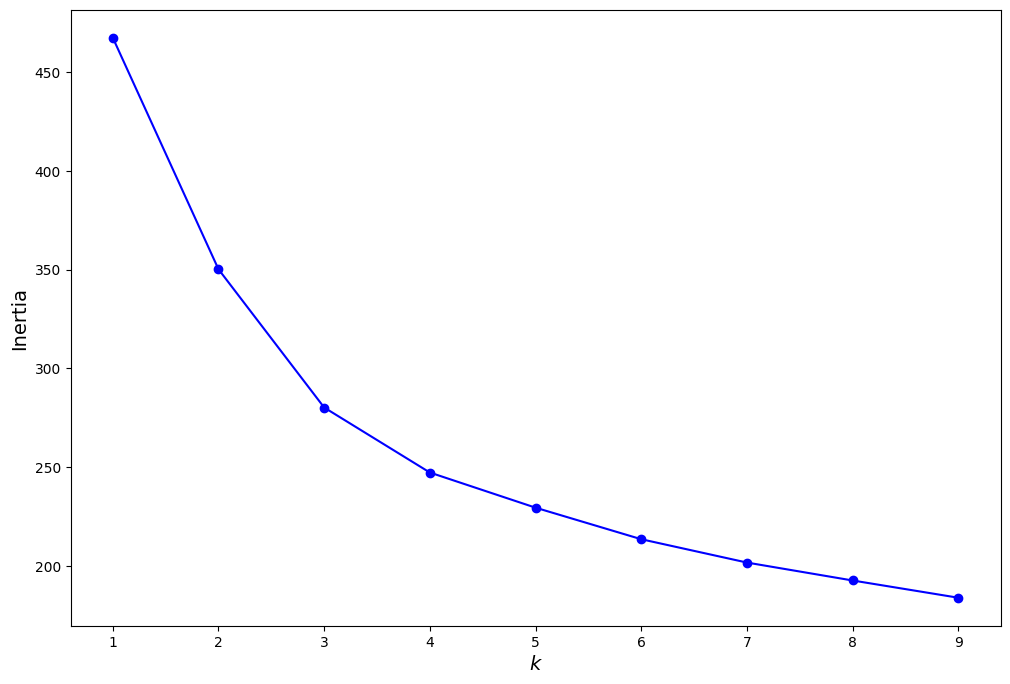

In [37]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
'''
plt.annotate('Elbow',
             xy=(4, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
'''
plt.show()